In [3]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility

#network and training
NB_EPOCH=200
BATCH_SIZE=64
VERBOSE=1
NB_CLASSES=10 # number of outputs=number of digits
OPTIMIZER=SGD() #SGD optimizer , explained later in this chapter
N_HIDDEN=128
VALIDATION_SPLIT=0.2 #how much TRAIN is reserved for VALIDATION

(X_train,y_train),(X_test,y_test)=mnist.load_data()


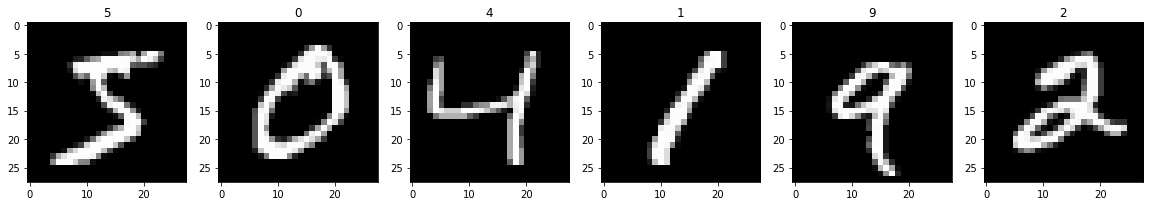

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

#plot first six training images
fig=plt.figure(figsize=(20,20))
for i in range(6):
    #ax=fig.add_subplot(1,6,i+1,xtics=[],yticks=[])
    ax=fig.add_subplot(1,6,i+1)
    ax.imshow(X_train[i],cmap='gray')
    ax.set_title(str(y_train[i]))

In [ ]:
RESHAPED=784
#
print(X_train.shape)

X_train=X_train.reshape(60000,RESHAPED)
print('after reshape',X_train.shape)
X_test=X_test.reshape(10000,RESHAPED)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
#normalize
#
X_train/=255
X_test/=255
print(X_train.shape,X_train.shape[0],'train samples')
print(X_train.shape,X_test.shape[0],'test samples')

#convert class vectors to binary class matrices
y_train=np_utils.to_categorical(y_train,NB_CLASSES)
y_test=np_utils.to_categorical(y_test,NB_CLASSES)




In [7]:
#10 outputs
# final stage is softmax
model=Sequential()
model.add(Dense(NB_CLASSES,input_shape=(RESHAPED,)))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

In [9]:
history=model.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 1s 29us/step - loss: 1.0784 - acc: 0.7514 - val_loss: 0.6576 - val_acc: 0.8536
Epoch 2/200
48000/48000 [==============================] - 1s 29us/step - loss: 0.6082 - acc: 0.8553 - val_loss: 0.5100 - val_acc: 0.8768
Epoch 3/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.5129 - acc: 0.8703 - val_loss: 0.4517 - val_acc: 0.8855
Epoch 4/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.4665 - acc: 0.8783 - val_loss: 0.4191 - val_acc: 0.8922
Epoch 5/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.4379 - acc: 0.8837 - val_loss: 0.3980 - val_acc: 0.8952
Epoch 6/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.4180 - acc: 0.8877 - val_loss: 0.3827 - val_acc: 0.9000
Epoch 7/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.4031 - acc: 0.8910 - val_loss: 0.3713 - 

Epoch 118/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.2725 - acc: 0.9241 - val_loss: 0.2735 - val_acc: 0.9249
Epoch 119/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.2724 - acc: 0.9238 - val_loss: 0.2733 - val_acc: 0.9247
Epoch 120/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.2722 - acc: 0.9242 - val_loss: 0.2733 - val_acc: 0.9247
Epoch 121/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.2720 - acc: 0.9242 - val_loss: 0.2732 - val_acc: 0.9251
Epoch 122/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.2717 - acc: 0.9243 - val_loss: 0.2732 - val_acc: 0.9250
Epoch 123/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.2716 - acc: 0.9243 - val_loss: 0.2731 - val_acc: 0.9244
Epoch 124/200
48000/48000 [==============================] - 1s 23us/step - loss: 0.2714 - acc: 0.9244 - val_loss: 0.2731 - val_acc: 0.9248
Epoch 125/200
48000/

In [10]:
score=model.evaluate(X_test,y_test,verbose=VERBOSE)
print("Test score:",score[0])
print('Test accuracy',score[1])


10000/10000 [==============================] - 0s 20us/step
('Test score:', 0.27130199307501318)
('Test accuracy', 0.92320000000000002)


## Accuracy
Train acc:  92.73%

val acc:    92.63%

Test acc :  92.37%